# Latar Belakang
Tingkat kepuasan pelanggan terhadap layanan yang diberikan merupakan faktor penting untuk sebuah perusahaan agar dapat terus berkembang. Oleh karena itu, sebuah maskapai penerbangan melakukan survey kepada para penumpangnya untuk mengetahui tingkat kepuasan masing-masing individu terhadap pelayanan maskapai.


## Rumusan Masalah
1. Apakah penumpang sudah puas dengan pelayanan maskapai secara keseluruhan?
2. Apa saja faktor yang mempengaruhi kepuasan penumpang?
3. Apa yang dapat maskapai lakukan untuk meningkatkan kepuasan penumpang?

# Data Preparation
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1oxg2zyQsRCPy5FP8PlDSGtlw9sz06glB). 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Berikut 5 baris teratas dan terbawah dari dataset airline passanger satisfaction.

In [ ]:
df=pd.read_csv('airline passanger satisfaction.csv', index_col=[0])
display(df.head(),df.tail())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Dataset ini berisi informasi terkait data diri penumpang dan nilai yang mereka berikan terhadap tiap layanan yang diberikan oleh maskapai. Ada 24 kolom di dalam dataset airline passanger satisfaction, yaitu:  

* ID : ID unik untuk tiap pelanggan
* Gender : Gender pelanggan (Male/Female)
* Customer Type : Tipe pelanggan (Loyal Customer/diloyal Customer)
* Age : Umur pelanggan
* Type of Travel : Tujuan penerbangan (Business/Personal)
* Class : Kelas tempat duduk
* Flight Distance : Jarak tempuh
* Inflight wifi service : Tingkat kepuasan untuk layanan wifi dalam penerbangan dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Departure/Arrival time convenient : Tingkat kepuasan untuk ketepatan waktu berangkat dan tiba dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Ease of Online booking : Tingkat kepuasan untuk kemudahan booking secara online dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Gate location : Tingkat kepuasan untuk lokasi pintu dalam bandara dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Food and drink : Tingkat kepuasan untuk makanan dan minuman dalam penerbangan dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Online boarding : Tingkat kepuasan untuk pengalaman online boarding dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Seat comfort : Tingkat kepuasan untuk kenyamanan tempat duduk pesawat dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Inflight entertainment : Tingkat kepuasan untuk layanan entertainment pesawat dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* On-board service : Tingkat kepuasan untuk layanan on-boarding dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Leg room service : Tingkat kepuasan untuk ruang kaki dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Baggage handling : Tingkat kepuasan untuk penanganan bagasi dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Checkin service : Tingkat kepuasan untuk layanan check-in dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Inflight service : Tingkat kepuasan untuk layanan dalam penerbangan dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Cleanliness : Tingkat kepuasan untuk kebersihan dari 1 (terendah) hingga 5 (tertinggi) - 0 (tidak mengisi)
* Departure Delay in Minutes : Delay keberangkatan dalam menit
* Arrival Delay in Minutes : Delay pendaratan dalam menit
* satisfaction : Kepuasan secara keseluruhan terhadap maskapai (Satisfied/Neutral atau unsatisfied)


Dari data dictionary di atas, dapat disimpulkan bahwa kolom-kolom dalam dataset ini dapat dibagi ke dalam 2 kategori.

1. Data riwayat penerbangan penumpang (`Gender`, `Age`, `Customer Type`, `Class`, dan `Flight Distance`).
2. Nilai terhadap layanan maskapai.

Mari kita lihat informasi umum dari dataset airline passanger satisfaction.

In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (103904, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-n

In [ ]:
display(df.describe(), df.describe(include='object'))

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,id,103904,"[70172, 5047, 110028, 24026, 119299, 111157, 82113, 96462, 79485, 65725, 34991, 51412, 98628, 83502, 95789, 100580, 71142, 127461, 70354, 66246, 39076, 22434, 43510, 114090, 105420, 102956, 18510, 14925, 118319, 75460, 48492, 27809, 70594, 30089, 58779, 79659, 110293, 48014, 96517, 64685, 64138, 60373, 14849, 28319, 103012, 124114, 107794, 81983, 53164, 82042, 72127, 113046, 1050, 54886, 125918, 7467, 78972, 126625, 114501, 114813, 32167, 68001, 117052, 8661, 57165, 78610, 51058, 92027, 115534, 9261, 61033, 75930, 112142, 24518, 112524, 101639, 85018, 106922, 32564, 92242, 73302, 42267, 121358, 65655, 88062, 91330, 22031, 27921, 51947, 40017, 76392, 118486, 6012, 30183, 41652, 15138, 123589, 114534, 93076, 96963, ...]"
1,Gender,2,"[Male, Female]"
2,Customer Type,2,"[Loyal Customer, disloyal Customer]"
3,Age,75,"[13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]"
4,Type of Travel,2,"[Personal Travel, Business travel]"
5,Class,3,"[Eco Plus, Business, Eco]"
6,Flight Distance,3802,"[460, 235, 1142, 562, 214, 1180, 1276, 2035, 853, 1061, 1182, 308, 834, 946, 453, 486, 2123, 2075, 2486, 1174, 208, 752, 2139, 452, 719, 1561, 315, 3347, 2342, 819, 1043, 2611, 1192, 349, 883, 550, 302, 354, 1734, 1452, 296, 2882, 529, 1522, 612, 1454, 731, 2076, 309, 775, 861, 3334, 2496, 602, 446, 216, 3475, 646, 2501, 2227, 1426, 190, 1532, 157, 1506, 205, 895, 516, 909, 1435, 1190, 1259, 1670, 3960, 817, 406, 404, 500, 689, 3100, 525, 931, 304, 1896, 261, 347, 1042, 1773, 342, 297, 332, 2388, 748, 1080, 231, 551, 972, 265, 488, 1144, ...]"
7,Inflight wifi service,6,"[3, 2, 4, 1, 5, 0]"
8,Departure/Arrival time convenient,6,"[4, 2, 5, 3, 1, 0]"
9,Ease of Online booking,6,"[3, 2, 5, 4, 1, 0]"


Secara umum, kita bisa melihat bahwa:
* dataset airline passanger satisfactions memiliki 24 kolom dan 103.904 baris
* kolom `Arrival Delay in Minutes` memiliki data kosong.
* kolom `ID` berisikan id unik untuk tiap penumpang, sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `Age` dapat dikelompokkan ke dalam beberapa kelompok untuk mempermudah analisa.
* kolom `Flight Distance` memiliki range data yang cukup besar, sehingga dapat dikelompokkan dalam beberapa kelompok.

### Drop Unnecessary Column

In [ ]:
# hapus kolom id yang tidak relevan
del df['id']
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

### Missing Value

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

Secara garis besar:  
* *missing value* di kolom `Arrival Delay in Minutes` memiliki proporsi yang cukup rendah 0.29%. 

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Kita akan menggunakan cara ini karena proporsi missing value yang cukup rendah pada data kita.
* kedua, mengisi data yang hilang.

#### Arrival Delay in Minutes
Kita akan menghapus baris-baring yang mengandung data yang hilang.

In [ ]:
df.dropna(axis=0, inplace=True)
df.isna().sum()/df.shape[0]*100

Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Inflight wifi service                0.0
Departure/Arrival time convenient    0.0
Ease of Online booking               0.0
Gate location                        0.0
Food and drink                       0.0
Online boarding                      0.0
Seat comfort                         0.0
Inflight entertainment               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Inflight service                     0.0
Cleanliness                          0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
satisfaction                         0.0
dtype: float64

In [ ]:
df.shape

(103594, 23)

Dapat kita lihat, Sebelum dibersihkan, kita memiliki 103.904 baris data, sekarang kita memiliki 103.594 baris. Sekitar 31 baris data yang hilang dihapus, dan tidak ada lagi baris yang mengandung data hilang.

## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [ ]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103594, 23)


,dataFeatures,dataType,null,unique,uniqueSample
0,Gender,object,0,2,"[Female, Male]"
1,Customer Type,object,0,2,"[Loyal Customer, disloyal Customer]"
2,Age,int64,0,75,"[53, 11]"
3,Type of Travel,object,0,2,"[Business travel, Personal Travel]"
4,Class,object,0,3,"[Eco Plus, Eco]"
5,Flight Distance,int64,0,3802,"[3246, 1360]"
6,Inflight wifi service,int64,0,6,"[5, 3]"
7,Departure/Arrival time convenient,int64,0,6,"[4, 1]"
8,Ease of Online booking,int64,0,6,"[0, 2]"
9,Gate location,int64,0,6,"[4, 1]"


# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk menjawab rumusan masalah yang sudah kita buat.

## Apakah penumpang sudah puas dengan pelayanan maskapai secara keseluruhan?

Untuk melihat apakah secara umum penumpang sudah puas dengan pelayanan maskapai, kita dapat membuat chart yang menampilkan perbandingan antara pelanggan yang puas dan yang tidak.

In [ ]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

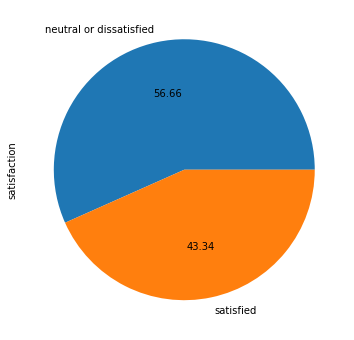

In [ ]:
def autopct(pct): # only show the label when it's > 10%
    return ('%.2f' % pct) if pct > 10 else ''

df['satisfaction'].value_counts().plot(kind='pie', figsize=(14,6), autopct=autopct)

Dapat kita lihat dari pie chart diatas bahwa penumpang yang merasa netral / tidak puas dengan pelayanan maskapai lebih besar dibanding dengan penumpang yang puas.

Penumpang yang merasa netral dan tidak puas berjumlah 58.697 orang (56.67%) sedangkan penumpang yang merasa puas berjumlah 44.897 (43.33%). 

Dapat kita simpulkan bahwa, **secara umum pelayanan maskapai belum bisa memenuhi harapan dari mayoritas penumpang**.

## Apa saja faktor yang mempengaruhi kepuasan penumpang?

Seperti yang sudah kita temukan diatas, bahwa para penumpang dibagi ke dalam beberapa kelompok. Kelompok-kelompok ini kita dapat dari data penerbangan yang ada di dalam dataset kita.

Antar lain:
1. Gender
2. Customer Type
3. Age
4. Type of Travel
5. Class

Oleh karena itu, kita akan coba menyelidiki layanan mana yang paling signifikan berpengaruh terhadap tiap kategori atau segmen.

### Gender

In [ ]:
# function to display satisfaction summary of selected column
def satisfaction_summary(col):
  c = df[col].unique()
  netral = [ df[(df[col] == x) & (df['satisfaction'] == 'neutral or dissatisfied')].shape[0] for x in df[col].unique()]
  satisfied = [ df[(df[col] == x) & (df['satisfaction'] == 'satisfied')].shape[0] for x in df[col].unique()]
  total = [netral[i] + satisfied[i] for i in range(len(c))]
  netral_percent = [round(netral[i] / total[i] * 100, 2) for i in range(len(c))]
  satisfied_percent = [round(satisfied[i] / total[i] * 100, 2) for i in range(len(c))]

  pd.set_option('display.max_rows', 500)
  pd.set_option('display.max_columns', 500)
  pd.set_option('display.width', 150)
  summary = pd.DataFrame({f'{col} Satisfaction': c, 
                          'Neutral_Dissatisfied_Val': netral, 
                          'Neutral_Dissatisfied_%':netral_percent, 
                          'Satisfied_Val': satisfied,  
                          'Satisfied_%':satisfied_percent,
                          'Total':total})
    
  print(summary)

satisfaction_summary('Gender')

  Gender Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  Male                28590                     56.04                   22428          43.96        51018
1  Female              30107                     57.26                   22469          42.74        52576


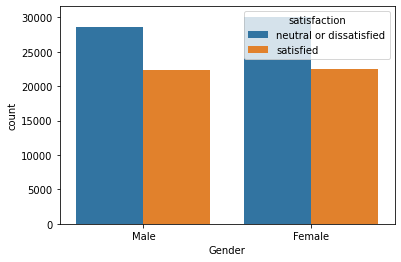

In [ ]:
sns.countplot(data=df, x="Gender", hue="satisfaction")

Dapat kita lihat dari countplot diatas bahwa gender tidak berpengaruh terhadap tingkat kepuasan penumpang. Pada plot diatas baik laki-laki maupun perempuan, sama-sama merasa tidak puas dengan layanan maskapai.

### Customer Type

In [ ]:
satisfaction_summary('Customer Type')

  Customer Type Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  Loyal Customer             44249                     52.27                   40413          47.73        84662
1  disloyal Customer          14448                     76.32                   4484           23.68        18932


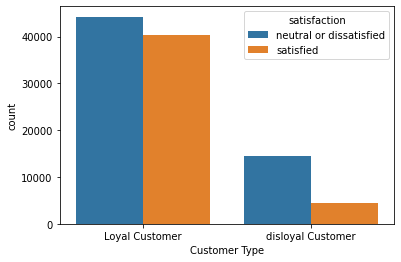

In [ ]:
sns.countplot(data=df, x="Customer Type", hue="satisfaction")

Dapat kita lihat dari countplot diatas bahwa loyalitas dari penumpang tidak berpengaruh terhadap kepuasan terhadap layanan maskapai. Baik penumpang yang loyal atau tidak, sama-sama tidak puas dengan pelayanan maskapai.

### Age
Untuk segmentasi umur, kita akan membagi kategori umur sesuai yang biasanya digunakan dalam dunia marketing. Bersumber dari [Pickfu.com](https://www.pickfu.com/demographic-segmentation#:~:text=Age%20segmentation%20means%20focusing%20on,64%2C%20and%2065%20and%20older.).
Kategori umur biasanya terbagi atas 18-24, 25-34, 35-44, 45-54, 55-64, and 65 and older.

Oleh karena itu kita akan membuat kolom baru untuk kategori umur ini.

In [ ]:
age_category = []
for a in df['Age']:
  if a < 18:
    age_category.append('<18')
  elif a >= 18 and a <= 24:
    age_category.append('18-24')
  elif a >= 25 and a <= 34:
    age_category.append('25-34')
  elif a >= 35 and a <= 44:
    age_category.append('35-44')
  elif a >= 45 and a <= 54:
    age_category.append('45-54')
  elif a >= 55 and a <= 64:
    age_category.append('55-64')
  else:
    age_category.append('65 and older')

df['age_category'] = age_category
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,<18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,25-34
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,25-34
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,25-34
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,55-64


In [ ]:
satisfaction_summary('age_category')

  age_category Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  <18                       6606                      83.61                   1295           16.39        7901 
1  25-34                     12409                     63.14                   7245           36.86        19654
2  55-64                     7138                      50.92                   6879           49.08        14017
3  45-54                     8986                      42.08                   12369          57.92        21355
4  35-44                     11951                     49.63                   12128          50.37        24079
5  18-24                     7742                      65.31                   4113           34.69        11855
6  65 and older              3865                      81.66                   868            18.34        4733 


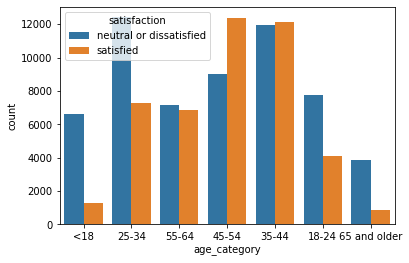

In [ ]:
sns.countplot(data=df, x="age_category", hue="satisfaction")

Dari segmentasi umur diatas dapat kita bahwa penumpang yang mengisi survey dan merasa tidak puas sebagian besar ada pada kategori umur 18-24, 25-34, 35-44 dan 45-54.

### Type of Travel

In [ ]:
satisfaction_summary('Type of Travel')

  Type of Travel Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  Personal Travel             28866                     89.84                   3263           10.16        32129
1  Business travel             29831                     41.74                   41634          58.26        71465


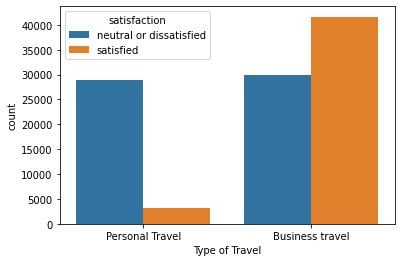

In [ ]:
sns.countplot(data=df, x="Type of Travel", hue="satisfaction")

Pada perjalanan pribadi, penumpang sangat cenderung tidak puas dibandingkan dengan penumpang yang melakukan perjalanan bisnis.

### Class

In [ ]:
satisfaction_summary('Class')

  Class Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  Eco Plus           5632                      75.42                   1836           24.58        7468 
1  Business           15143                     30.57                   34390          69.43        49533
2  Eco                37922                     81.39                   8671           18.61        46593


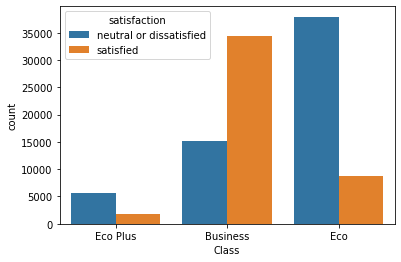

In [ ]:
sns.countplot(data=df, x="Class", hue="satisfaction")

Sebagian besar penumpang maskapai melakukan perjalanan dengan kelas Eco, dan penumpang dengan kelas ini jauh lebih banyak merasakan ketidakpuasan.

### Flight Distance

Untuk memudahkan analisa kita akan membagi flight distance menjadi 2 kategori yaitu <=1000 dan > 1000. 

In [ ]:
flight_distance_category = []
for a in df['Flight Distance']:
  if a <= 1000:
    flight_distance_category.append('<=1000')
  else:
    flight_distance_category.append('>1000')

df['flight_distance_category'] = flight_distance_category
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_category,flight_distance_category
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,<18,<=1000
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,25-34,<=1000
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,25-34,>1000
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,25-34,<=1000
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,55-64,<=1000


In [ ]:
satisfaction_summary('flight_distance_category')

  flight_distance_category Satisfaction  Neutral_Dissatisfied_Val  Neutral_Dissatisfied_%  Satisfied_Val  Satisfied_%  Total
0  <=1000                                40164                     67.05                   19738          32.95        59902
1  >1000                                 18533                     42.42                   25159          57.58        43692


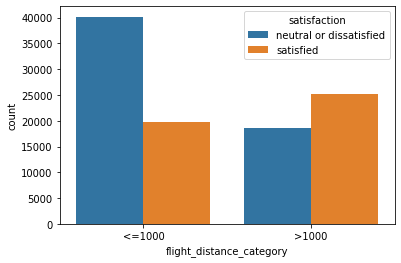

In [ ]:
sns.countplot(data=df, x="flight_distance_category", hue="satisfaction")

Pada perjalanan kurang dari 1000 miles, penumpang lebih merasakan ketidakpuasan dibandingkan dengan perjalanan dengan jarak tempuh yang lebih jauh.

## Subset Data

Dari analsis diatas, kita akan coba melakukan subset terhadap dataset keseluruhan sebelum melanjutkan analisis untuk mencari layanan yang paling berpengaruh terhadap ketidakpuasan penumpang.

In [ ]:
age_gap = ['18-24','25-34','35-44','45-54']
df_new = df[(df['age_category'].isin(age_gap)) & 
            (df['Type of Travel'] == 'Personal Travel') & 
            (df['Class'] == 'Eco') & 
            (df['flight_distance_category'] == '<=1000')]

Dari dataframe yang baru ini kita akan coba melihat korelasi antara tiap layanan yang diberikan maskapai dengan tingkat kepuasan penumpang.

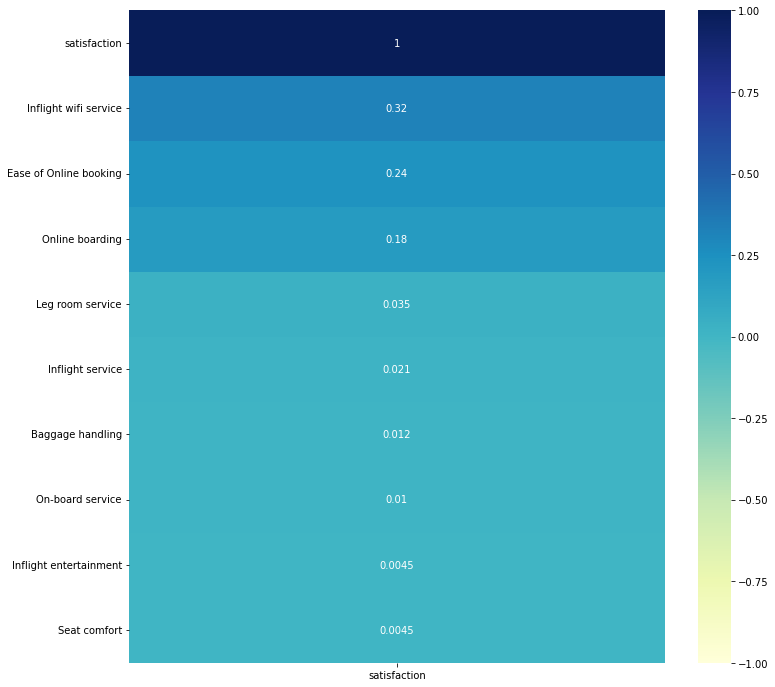

In [ ]:
# subset dataset with services and satisfaction only
services = ['Inflight wifi service',
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location',
'Food and drink',
'Online boarding',
'Seat comfort',
'Inflight entertainment',
'On-board service',
'Leg room service',
'Baggage handling',
'Checkin service',
'Inflight service',
'Cleanliness',
'Departure Delay in Minutes',
'Arrival Delay in Minutes',
'satisfaction']

df_new_services = df_new[services]

# change satisfaction column to 0 and 1
df_new_services['satisfaction'] = df_new_services['satisfaction'].apply(lambda s: 1 if s == 'satisfied' else 0)


fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df_new_services.corr()[['satisfaction']].sort_values('satisfaction').tail(10), vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax)
ax.invert_yaxis()

3 pelayanan jenis pelayanan yang memiliki pengaruh terbesar terhadap tingkat kepuasan penumpang adalah **Inflight wifi service, Ease of Online booking, dan Online boarding**.

# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tentang kepuasan penumpang maskapai:
* Dari 103.594 data penumpang yang kita gunakan, 56.66% penumpang merasa tidak puas. Ini menunjukkan bahwa pelayanan maskapai belum sesuai dengan harapan penumpang.
* Ketidakpuasan tertinggi berasal dari penumpang dengan range umur 25-34 tahun.
* Penumpang yang tidak puas kebanyakan menggunakan kelas Eco pada perjalanan pribadi dan menempuh perjalanan yang tidak terlalu jauh (< 1000 miles).
* Pada kelas Eco tingkat ketidakpuasan penumpang sangat tinggi yaitu sebesar 81.39%.
* Kesetiaan penumpang terhadap sebuah maskapai tidak menjamin bahwa ia puas terhadap layanan dari maskapai tersebut. Hal ini ditandai dengan 52.27% penumpang yang setia tetap merasa tidak puas dengan pelayanan maskapai.


Faktor yang berpengaruh terhadap tingkat kepuasan dari penumpang:
* Tingkat umur, tipe perjalanan, kelas dan jarak tempuh dari perjalanan.
* Jaringan wifi dalam penerbangan, booking secara online dan boarding secara online merupakan 3 jenis layanan maskapai yang paling berpengaruh terhadap tingkat kepuasan penumpang.
* Ruang kaki, pelayanan selama penerbangan dan penanganan bagasi merupakan hal minor yang dapat ditingkatkan maskapai.

**Rekomendasi**
1. Memperbaiki jaringan wifi yang ada di dalam pesawat guna memenuhi kebutuhan internet para penumpang. Hal ini dapat dilakukan dengan mengganti router wifi dengan versi terbaru ataupun bekerjasama dengan provider internet yang lebih baik.
2. Melakukan penggantian sistem manual dengan sistem digital, sehingga mendukung pelayanan online booking dan online boarding yang sangat dibutuhkan oleh penumpang.
3. Menaikkan standar pelayanan kelas Eco sehingga dapat bersaing dengan kelas Business yang memiliki tingkat kepuasan lebih baik.
4. Target marketing maskapai dapat diarahkan pada penumpang yang berusia 25-34 tahun yang sering melakukan perjalanan liburan lokal.

Dengan berfokus pada beberapa layanan dan target penumpang yang spesifik, diharapkan analisis ini dapat membantu maskapai untuk mengerti layanan-layanan yang dibutuhkan oleh para penumpang, serta dengan tepat dapat meningkatkan layanan-layanan tersebut.